In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

from TSP import read_matrix
import matplotlib.pyplot as plt
from GA import genetic_algorithm
import random
def solve(problem, 
          population_size=100, 
          generations=100, 
          mutation_rate=0.1, 
          mutation_algorithm='swap', 
          crossover_algorithm='order', 
          selection_algorithm='elitism'):
    n_cities = len(problem)
    solution = genetic_algorithm(n_cities, problem, 
                                 population_size=population_size, 
                                 generations=generations, 
                                 mutation_rate=mutation_rate, 
                                 mutation_algorithm=mutation_algorithm, 
                                 crossover_algorithm=crossover_algorithm, 
                                 selection_algorithm=selection_algorithm)
    
    return solution['distance'], solution['route'], solution['fitness']

def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()

# Trường hợp 1

In [3]:
problem1 = read_matrix('../data/15Cities-1194.txt')

## Mặc định

1194
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 1]


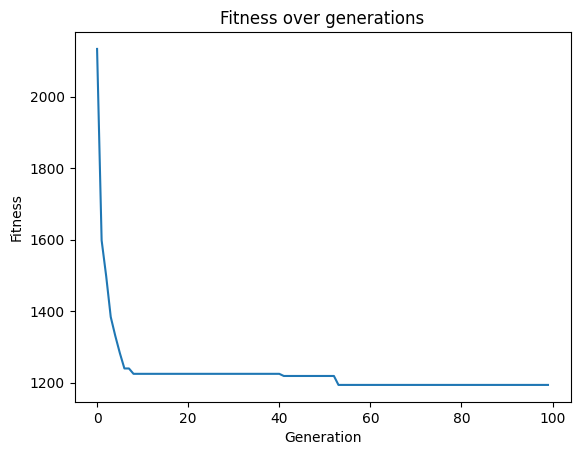

In [9]:
distances1, route1, fitness1 = solve(problem1)
while (distances1 != 1194):
    distances1, route1, fitness1 = solve(problem1)
print(distances1)
print(route1)
plot_fitness(fitness1)

## Tăng một chút về cả ba tham số

1194
[1, 2, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 1]


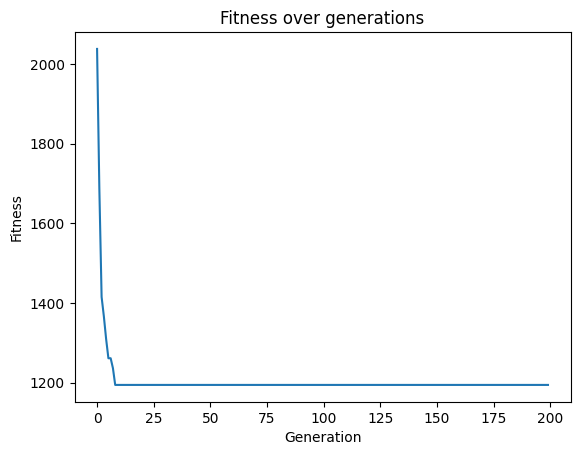

In [10]:
distances1, route1, fitness1 = solve(problem1, generations=200, mutation_rate=0.05, population_size=200)
while (distances1 != 1194):
    distances1, route1, fitness1 = solve(problem1, generations=200, mutation_rate=0.05, population_size=200)
print(distances1)
print(route1)
plot_fitness(fitness1)

* Với bộ tham số này sẽ giải quyết được trường hợp dưới 15 đỉnh với tốc độ khá nhanh
---

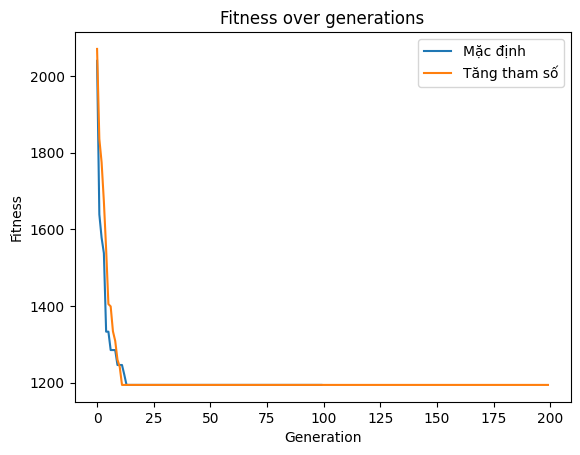

In [23]:
distances1, route1, fitness1 = solve(problem1)
while (distances1 != 1194):
    distances1, route1, fitness1 = solve(problem1)

distances2, route1, fitness2 = solve(problem1, generations=200, mutation_rate=0.05, population_size=200)
while (distances2 != 1194):
    distances2, route1, fitness2 = solve(problem1, generations=200, mutation_rate=0.05, population_size=200)


# Plot both fitness1 and fitness2 on the same graph
plt.plot(fitness1, label='Mặc định')
plt.plot(fitness2, label='Tăng tham số')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()

# Trường hợp 2

In [25]:
problem2 = read_matrix('../data/26Cities-937.txt')

## Sử dụng lại tham số và thuật toán trên

1031
[1, 2, 3, 14, 15, 13, 12, 21, 22, 25, 24, 23, 26, 17, 18, 20, 19, 16, 11, 10, 9, 8, 7, 5, 6, 4, 1]


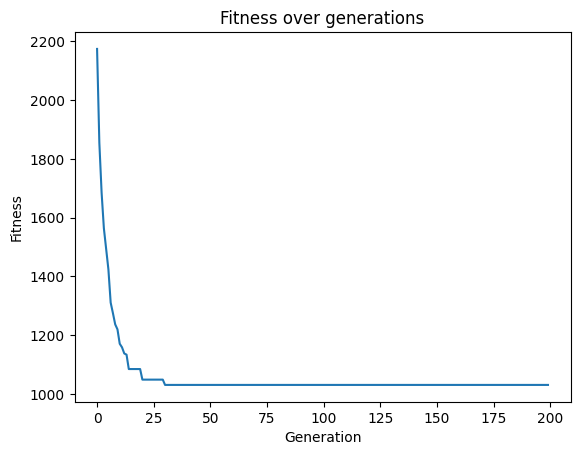

In [26]:
distances1, route1, fitness1 = solve(problem2, generations=200, mutation_rate=0.05, population_size=200)
while (distances1 > 1050):
    distances1, route1, fitness1 = solve(problem2, generations=200, mutation_rate=0.05, population_size=200)
print(distances1)
print(route1)
plot_fitness(fitness1)

## Tăng đồng thời cả 3 tham số

1035
[1, 2, 4, 6, 5, 7, 8, 9, 14, 13, 12, 11, 10, 16, 19, 20, 18, 17, 21, 22, 26, 23, 24, 25, 15, 3, 1]


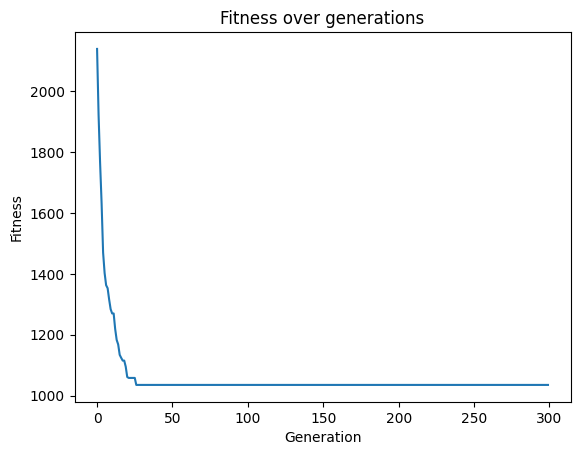

In [27]:
distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.1, population_size=300)
while (distances2 > 1050):
    distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.1, population_size=300)
print(distances2)
print(route2)
plot_fitness(fitness2)

* Khi tăng đồng thời 3 tham số, kết quả đã có sự cải thiện nhiều. Khá là gần với kết quả tối ưu

## Đổi thuật toán chọn sang "Tournament selection"

## Giữ tham số như trên

1648
[1, 2, 13, 8, 3, 10, 15, 14, 16, 11, 7, 4, 6, 19, 18, 20, 21, 22, 12, 9, 5, 17, 26, 23, 24, 25, 1]


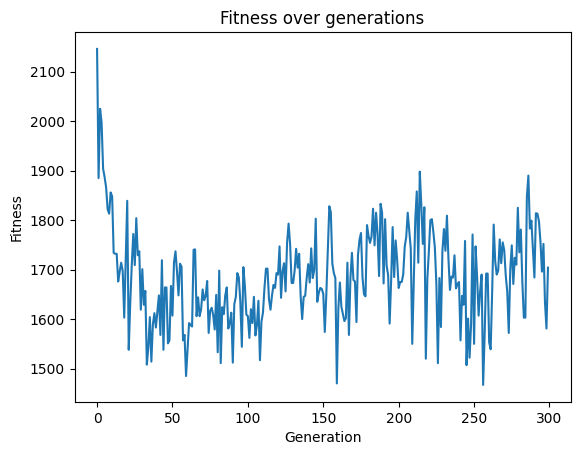

In [28]:
distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.1, population_size=300, selection_algorithm='tournament')
# while (distances2 > 1050):
#     distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.1, population_size=300, selection_algorithm='tournament')
print(distances2)
print(route2)
plot_fitness(fitness2)

* Với tham số như vậy sẽ không tối ưu cho bài toán

## Giảm mutation rate

937
[1, 2, 3, 4, 6, 5, 7, 8, 9, 10, 14, 15, 13, 12, 11, 16, 19, 20, 18, 17, 21, 22, 26, 23, 24, 25, 1]


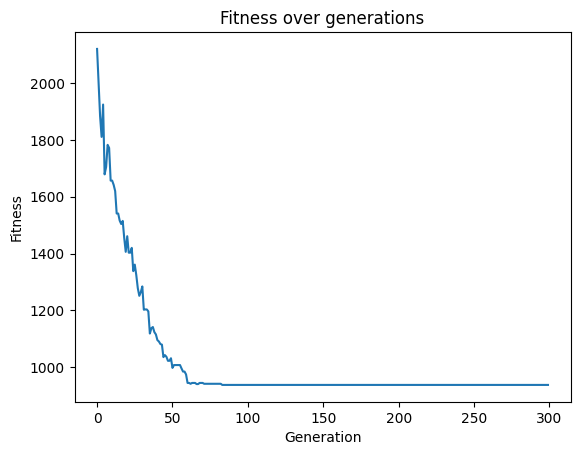

In [30]:
distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.02, population_size=300, selection_algorithm='tournament')
while (distances2 != 937):
    distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.02, population_size=300, selection_algorithm='tournament')
print(distances2)
print(route2)
plot_fitness(fitness2)

* Kết quả đã có sự cải thiện hơn trước nhiều

## Tăng population size 

937
[1, 2, 3, 4, 6, 5, 7, 8, 9, 10, 14, 15, 12, 13, 11, 16, 19, 20, 18, 17, 21, 22, 26, 23, 24, 25, 1]


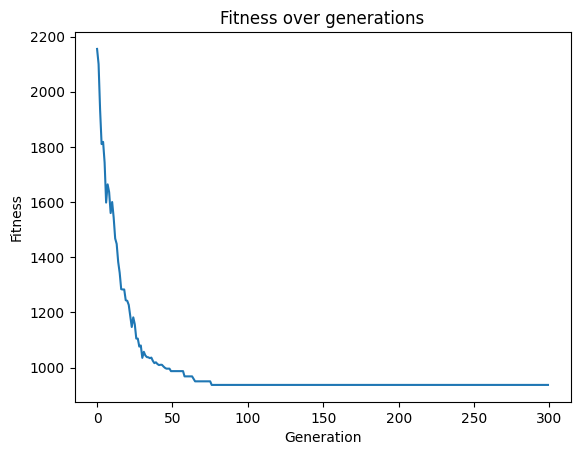

In [31]:
distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
while (distances2 != 937):
    distances2, route2, fitness2 = solve(problem2, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
print(distances2)
print(route2)
plot_fitness(fitness2)

* Tăng một chút ở population size thì ta đã tìm ra được lời giải tối ưu, mặc dù hơi mất thời gian

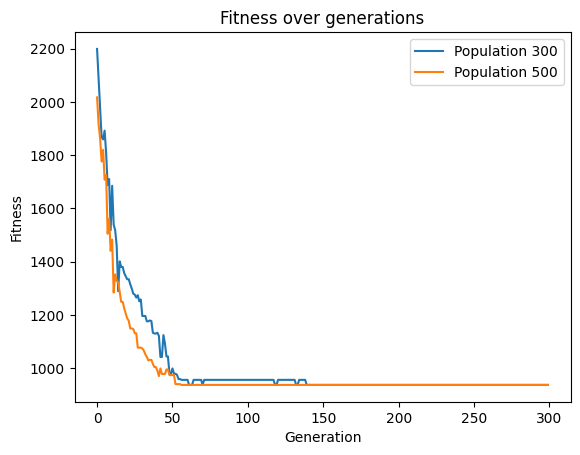

In [34]:
distances1, route1, fitness1 = solve(problem2, generations=300, mutation_rate=0.02, population_size=300, selection_algorithm='tournament')
while (distances1 != 937):
    distances1, route1, fitness1 = solve(problem2, generations=300, mutation_rate=0.02, population_size=300, selection_algorithm='tournament')

distances2, route1, fitness2 = solve(problem2, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
while (distances2 != 937):
    distances2, route1, fitness2 = solve(problem2, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')

# Plot both fitness1 and fitness2 on the same graph
plt.plot(fitness1, label='Population 300')
plt.plot(fitness2, label='Population 500')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()

# Trường hợp 3

In [35]:
problem3 = read_matrix('../data/42Cities-699.txt')

## Giữ tham số trên

850
[1, 2, 42, 41, 40, 39, 38, 37, 35, 34, 31, 30, 32, 33, 36, 5, 4, 3, 6, 7, 8, 9, 10, 25, 24, 27, 26, 29, 28, 11, 12, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 1]


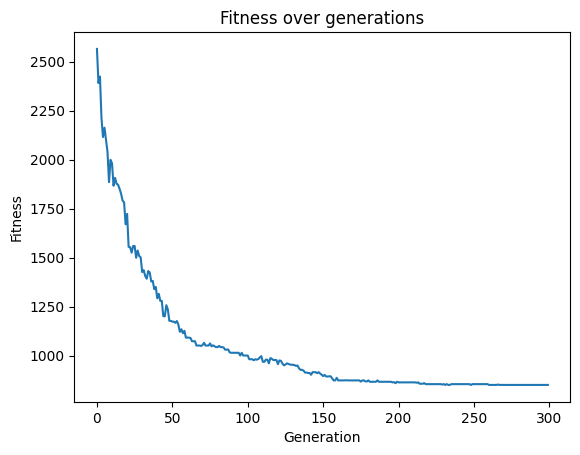

In [ ]:
distances3, route3, fitness3 = solve(problem3, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
while (distances3 > 1000):
    distances3, route3, fitness3 = solve(problem3, generations=300, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
print(distances3)
print(route3)
plot_fitness(fitness3)

* Tham số vẫn khá tốt

## Tăng một chút ở generation

863
[1, 2, 42, 41, 40, 39, 5, 7, 6, 35, 34, 32, 33, 29, 28, 30, 31, 36, 37, 38, 4, 3, 8, 9, 24, 27, 26, 25, 10, 12, 11, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 1]


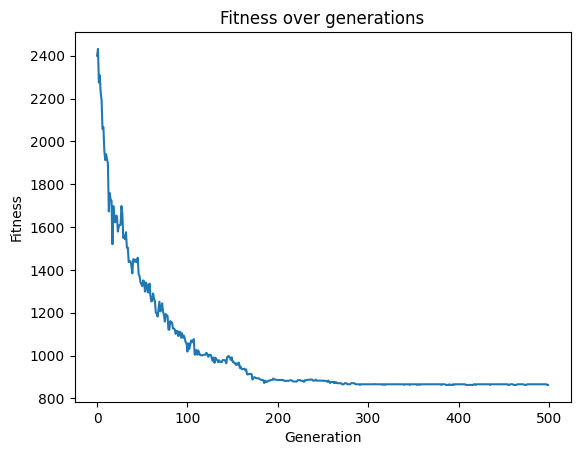

In [33]:
distances3, route3, fitness3 = solve(problem3, generations=500, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
while (distances3 > 1000):
    distances3, route3, fitness3 = solve(problem3, generations=500, mutation_rate=0.02, population_size=500, selection_algorithm='tournament')
print(distances3)
print(route3)
plot_fitness(fitness3)

* Không có quá nhiều sự khác biệt ở trên ngoại trừ việc chạy lâu hơn một tý

## Đổi thuật toán và điều chỉnh tham số

751
[1, 2, 42, 41, 40, 4, 3, 9, 8, 7, 5, 6, 26, 27, 24, 25, 10, 12, 11, 22, 23, 13, 14, 15, 16, 17, 18, 19, 20, 21, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 1]


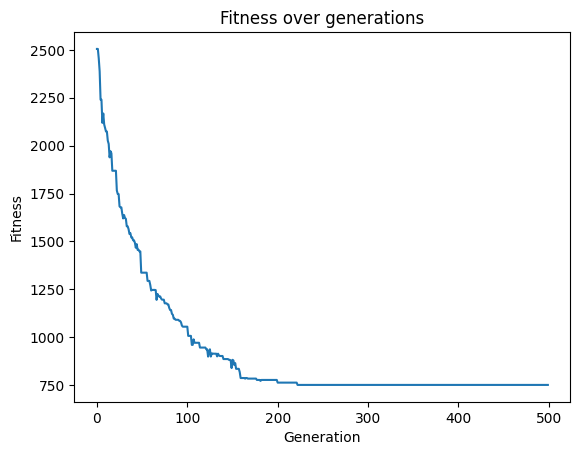

In [ ]:
distances3, route3, fitness3 = solve(problem3, generations=500, mutation_rate=0.2, population_size=400, 
                                     selection_algorithm='tournament', mutation_algorithm='inversion', crossover_algorithm='uniform')
while (distances3 > 1000):
    distances3, route3, fitness3 = solve(problem3, generations=500, mutation_rate=0.2, population_size=400, 
                                     selection_algorithm='tournament', mutation_algorithm='inversion', crossover_algorithm='uniform')
print(distances3)
print(route3)
plot_fitness(fitness3)

### Đổi sang thuật toán chọn "Rank"

708
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 24, 25, 26, 27, 22, 23, 17, 13, 14, 15, 16, 18, 19, 20, 21, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 1]


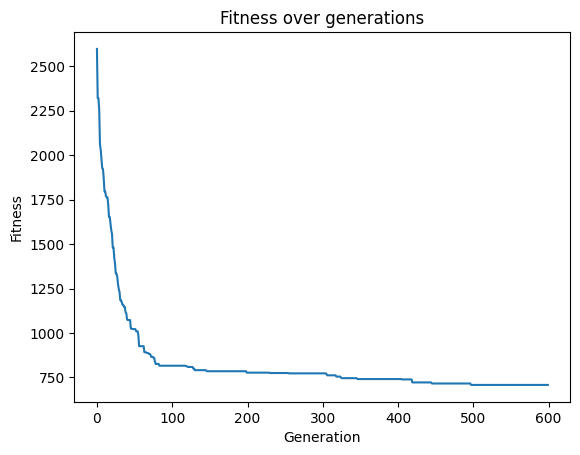

In [ ]:
distances3, route3, fitness3 = solve(problem3, generations=600, mutation_rate=0.2, population_size=100, 
                                     selection_algorithm='rank', mutation_algorithm='inversion', crossover_algorithm='order')
while (distances3 > 750):
    distances3, route3, fitness3 = solve(problem3, generations=600, mutation_rate=0.2, population_size=100, 
                                     selection_algorithm='rank', mutation_algorithm='inversion', crossover_algorithm='order')
print(distances3)
print(route3)
plot_fitness(fitness3)

* Kết quả rất sát với kết quả tối ưu

# Trường hợp 4

In [2]:
problem4 = read_matrix('../data/48Cities-33523.txt')

35237
[1, 8, 9, 38, 31, 44, 7, 28, 6, 37, 19, 27, 17, 43, 30, 36, 18, 46, 15, 40, 3, 23, 11, 12, 33, 20, 47, 13, 21, 39, 32, 24, 42, 10, 45, 35, 4, 26, 2, 29, 5, 48, 25, 14, 34, 41, 22, 16, 1]


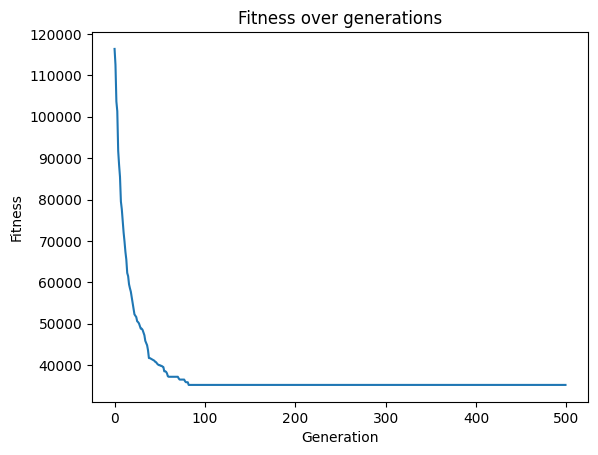

In [3]:
distances4, route4, fitness4 = solve(problem4, generations=500, mutation_rate=0.2, population_size=500, 
                                     selection_algorithm='rank', mutation_algorithm='inversion', crossover_algorithm='order')
while (distances4 > 36000):
    distances4, route4, fitness4 = solve(problem4, generations=500, mutation_rate=0.2, population_size=400, 
                                     selection_algorithm='rank', mutation_algorithm='inversion', crossover_algorithm='order')
print(distances4)
print(route4)
plot_fitness(fitness4)